In [2]:
# Imports
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import pandas as pd

# dataset is imported
# columns: label for clothing, 784 pixels
# row: 60,000 training examples 
(input_X_train, output_Y_train), (input_X_test, output_Y_test) = keras.datasets.fashion_mnist.load_data()
# input_X_train: 784 pixel training row
# output_Y_train: the training label for each row

# input_X_test: 784 pixel test row
# output_Y_test: the test label for each row

input_X_train, input_X_val, output_Y_train, output_Y_val = train_test_split(input_X_train, output_Y_train, test_size=0.2)
# 20% of the training set is given to the validation set

def normalise(data):
    return data.reshape(data.shape[0],28,28,1)/255

input_X_train = normalise(input_X_train)
input_X_val = normalise(input_X_val)
input_X_test = normalise(input_X_test)

# Training set: 48,000
# Training set is a bunch of images with labels. 
# The model will look at the images and guess what it is, it will then compare it against the label to see if it got the correct answer.

# Validaton set: 12,000
# Validation: 
# Its a practice test. It's a separate bunch of images the model hasn't seen during training. 
# After each round of training (called an epoch), the model is tested on these new images to see how well it's learned.
# If the model does well on the practice test (validation set), it means it's learning the right things and not just memorizing the training images. 

# Test set: 10,000
# Our test set of images to test on





To obtain the validation set, I used the train_test_split function from scikit-learn. This function splits the training data (input_X_train and output_Y_train) into training and validation sets.

 I specified the test_size parameter as 0.2, indicating that 20% of the data will be allocated to the validation set.

The size of the validation set was chosen based on common practices in machine learning. It's typical to reserve a portion of the training data for validation to assess the model's performance during training without compromising the test set's integrity. A 20% validation set size is a common choice


Visualise a random sample image of the dataset. 

---



Sample input image: [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
 

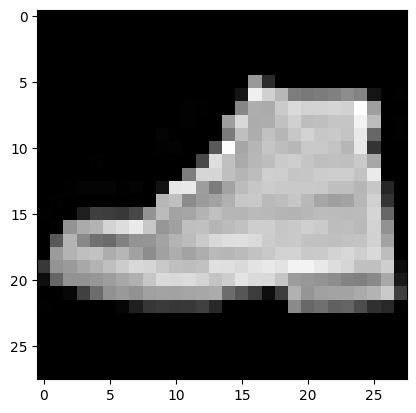

In [4]:
# A random image is selected from the training set
Selected_Image = random.randint(1,48000)
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image, cmap='gray')
plt.show() 

In [5]:
# Define the model
#This initializes a sequential model, which means you can add layers in a sequence.
model = Sequential([
    #Convolutional layers extract features from the input data.
    Conv2D(16, kernel_size=3, strides= 1, padding='same', activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.000001)),
    # This adds a 2D convolutional layer with 16 filters, each having a kernel size of 3x3.
    # All 16 filters are run against every input image
    # strides=1 means the filter slides one pixel at a time horizontally and vertically.
    # padding='same' pads the input such that the output has the same height and width as the input.
    # An activation function in a (CNN) is like a switch that decides whether a neuron should be "activated" or not based on the input it receives.
    # One common activation function is called ReLU (Rectified Linear Unit). It's like a switch that turns on if the input is positive, and off if it's negative. 
    # So, if the input is greater than zero, the neuron activates (fires), and if it's negative, it stays off.
    # It  returns 0 for any negative input and returns the input value itself for any positive input.
    # input_shape=(28, 28, 1) specifies the shape of the input data, which is a 28x28 grayscale image.

     MaxPooling2D(pool_size=2, strides = 1, padding='same'),
    # A pooling layer of 2*2 size is then ran over by a stride of 1 outputting a 14*14 matrix. But because of padding its 28*28.
     Dropout(0.3),
    #convolutional filters are responsible for learning patterns and features from the input data,
    #while max pooling takes the most important features of input data.

    Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.000001)),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.000001)),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Flatten(),
    Dense(600, activation='relu'),
     Dropout(0.3),
    Dense(10, activation='softmax')
    #Dense layers process the flattened features to perform classification or regression tasks.
    # There are 600 neurons taking in the flattened data where the model adjusts the weights on the patterns its learnt. 
    # Softmax is the activation function for the output layer. It gives a probability for each of the 10 possible choices it could be.
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

Train the CNN model. 

---

Epoch 1/80
375/375 [==============================] - 30s 72ms/step - loss: 0.9223 - accuracy: 0.6562 - val_loss: 0.6396 - val_accuracy: 0.7899
Epoch 2/80
375/375 [==============================] - 27s 71ms/step - loss: 0.5675 - accuracy: 0.7888 - val_loss: 0.5140 - val_accuracy: 0.8226
Epoch 3/80
375/375 [==============================] - 26s 68ms/step - loss: 0.4996 - accuracy: 0.8150 - val_loss: 0.4665 - val_accuracy: 0.8374
Epoch 4/80
375/375 [==============================] - 25s 67ms/step - loss: 0.4598 - accuracy: 0.8313 - val_loss: 0.4339 - val_accuracy: 0.8511
Epoch 5/80
375/375 [==============================] - 25s 67ms/step - loss: 0.4303 - accuracy: 0.8421 - val_loss: 0.3968 - val_accuracy: 0.8639
Epoch 6/80
375/375 [==============================] - 25s 67ms/step - loss: 0.4068 - accuracy: 0.8518 - val_loss: 0.3896 - val_accuracy: 0.8629
Epoch 7/80
375/375 [==============================] - 23s 62ms/step - loss: 0.3892 - accuracy: 0.8586 - val_loss: 0.3703 - val_accuracy:

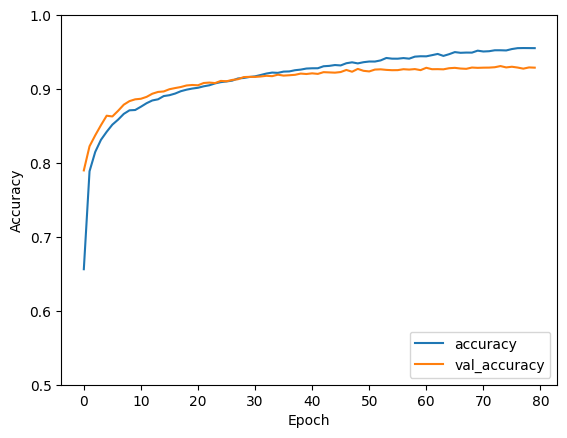

In [6]:
# your code here
# Train the model for 10 epochs
history = model.fit(input_X_train, output_Y_train, epochs=80,batch_size=128,  
                    validation_data=(input_X_val,output_Y_val))




# Plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
# A round of training where all the images are fed into the CNN 
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

Evaluate the model. 

In [7]:
test_loss, test_acc = model.evaluate(input_X_val,output_Y_val)
# During model training, the loss function measures how well the model's predictions match the actual labels. 
# Lower values of the loss function indicate better performance, as they indicate that the model's predictions are closer to the true labels

# Get the highest validation accuracy
max_val_acc = max(history.history['val_accuracy'])
print("The highest accuracy is " + str(max_val_acc * 100) + "% Accurate")

375/375 [==============================] - 3s 9ms/step - loss: 0.2078 - accuracy: 0.9289
The highest accuracy is 93.10833215713501% Accurate


The highest accuracy is 93.4499979019165% Accurate.
I obtained it by getting the highest accuracy out of my 80 epochs.

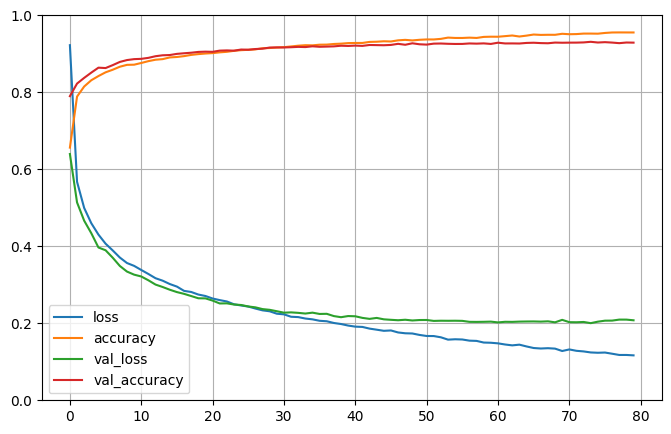

Test accuracy: 92.89%
Test loss: 20.78%


In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

I did not use l1 regularisation as this was not suitable for such a small neural network. In small neural networks, L1 regularization makes lots of weights exactly zero, which can cause problems. Even tiny changes in these weights can mess up the model's performance, leading to unstable training and not-so-good results.

When I did ten epochs to compare:

I used L2 regularisation and got:
Epoch 10/10
375/375 [==============================] - 20s 53ms/step - loss: 0.3554 - accuracy: 0.8725 - val_loss: 0.3323 - val_accuracy: 0.8822

Withou tregularisatiot I got: 
Epoch 10/10
375/375 [==============================] - 26s 70ms/step - loss: 0.3539 - accuracy: 0.8706 - val_loss: 0.3202 - val_accuracy: 0.88

The differences between the two approaches are likely marginal because the regularization strength used (L2 regularization with a regularization parameter of 0.000001) is very small. This small regularization strength may not have had a substantial effect on the model's ability to generalize to unseen data (validation set).

Additionally, the dataset used (Fashion MNIST) may not have been very prone to overfitting in the first place, especially with the relatively simple architecture used and the small number of epochs trained. As a result, the regularization may not have had a significant impact on the model's performance.

Furthermore, the performance metrics (loss and accuracy) are very similar between the two models, suggesting that the differences observed could simply be due to randomness in the training process rather than the regularization technique itself.

Overall, while regularization techniques like L2 regularization are important for preventing overfitting in deep learning models, their impact can vary depending on factors such as the dataset, model architecture, and regularization strength. In this specific case, the marginal differences observed could be attributed to these  marks)**

In conclusion: 
In conclusion, the model performed reasonably well on the Fashion MNIST dataset, achieving over 85% validation accuracy. This indicates that the model is effective at classifying items within this dataset with a high degree of accuracy.

To further improve the performance of the model, several strategies can be considered:

Increase Training Epochs: Training the model for more epochs can allow it to learn more complex patterns and improve its accuracy. However, care must be taken to avoid overfitting by monitoring the validation l 
This is because as the model is trained for more epochs, it has more opportunities to memorize the training data instead of learning meaningful patterns. This can result in the model becoming overly specialised to the training examples and performing poorlyata unseen doss.

Increasxity by: e Model CompleAdding more convolutional layers, increasing the number of filters, or introducing additional dense layers can enhance the model's capacity to capture intricate featur exas in the data.mples.

Hyperparameter Tuning: Experimenting with different hyperparameters such as learning rate, batch size, dropout rate, and regularization strenpgth can lead to erformance dataset.

---

